In [1]:
import f110_gym
import f110_orl_dataset
import gymnasium as gym

In [2]:
evaluation_agents = ["StochasticContinousFTGAgent_0.5_1_0.2_0.15_0.15_5.0_0.6_0.9",
                        "StochasticContinousFTGAgent_0.75_0_0.2_0.15_0.15_5.0_0.3",
                        "pure_pursuit_1.0_1.2_raceline",
                        "pure_pursuit_0.85_1.0_raceline_og",
                        "pure_pursuit_0.6_0.5_raceline_og_3",
                        "StochasticContinousFTGAgent_0.45_1_0.2_0.15_0.15_5.0_0.6_0.9",
                        "StochasticContinousFTGAgent_1.0_7_0.2_0.15_0.15_5.0_0.3",
                        ]
F110Env = gym.make("f110-real-v1",
# only terminals are available as of right now 
    encode_cyclic=True,
    flatten_obs=True,
    timesteps_to_include=(0,250),
    use_delta_actions=True,
    include_timesteps_in_obs = False,
    set_terminals=True,
    delta_factor=1.0,
    reward_config="reward_progress.json",
    include_pose_time_diff=False,
    include_action_pose_time_diff = False,
    include_time_obs = False,
    include_progress=False,
    **dict(name="f110-real-v1",
        config = dict(map="Infsaal2", num_agents=1,
        params=dict(vmin=0.0, vmax=2.0)),
        render_mode="human")
)
print(F110Env.keys)

/home/fabian/msc/f110_dope/ws_release/f1tenth_gym/gym/f110_gym/envs/integrator.py:13: UserWarning: Chosen integrator is RK4. This is different from previous versions of the gym.
  warnings.warn(


Infsaal2_map.pgm
loading centerline from: /home/fabian/msc/f110_dope/ws_release/f1tenth_gym/gym/f110_gym/maps/Infsaal2/Infsaal2_centerline.csv
Loading raceline from file: /home/fabian/msc/f110_dope/ws_release/f1tenth_gym/gym/f110_gym/maps/Infsaal2/Infsaal2_raceline.csv
Infsaal2_map.pgm
loading centerline from: /home/fabian/msc/f110_dope/ws_release/f1tenth_gym/gym/f110_gym/maps/Infsaal2/Infsaal2_centerline.csv
Loading raceline from file: /home/fabian/msc/f110_dope/ws_release/f1tenth_gym/gym/f110_gym/maps/Infsaal2/Infsaal2_raceline.csv
Agent configs taken from: /home/fabian/msc/f110_dope/ws_release/f1tenth_orl_dataset/f110_orl_dataset/agent_configs
['poses_x', 'poses_y', 'theta_sin', 'theta_cos', 'ang_vels_z', 'linear_vels_x', 'linear_vels_y', 'previous_action_steer', 'previous_action_speed']


In [3]:
from dataset import F110Dataset
behavior_dataset = F110Dataset(
    F110Env,
    normalize_states=False,
    normalize_rewards=False,
    remove_agents= evaluation_agents,
    #only_agents=['pure_pursuit_2.0_0.15'], #["StochasticContinousFTGAgent_0.15_5_0.2_0.15_2.0"],
    # = ['StochasticContinousFTGAgent_0.5_5_0.2_0.3_2.0',],
    #                  'StochasticContinousFTGAgent_0.5_5_0.2_0.3_2.0',
    #                  'StochasticContinousFTGAgent_5.0_2_0.2_0.3_2.0',
    #                  'StochasticContinousFTGAgent_5.0_5_0.2_0.3_2.0'],#,'StochasticContinousFTGAgent_3.0_5_0.2_0.3_2.0'], #'progress_weight', 'raceline_delta_weight', 'min_action_weight'],#['det'], #+ [FLAGS.target_policy] , #+ ["min_lida", "raceline"],
    
)

using default path
path: /home/fabian/.f110_rl_datasets/f110-real-v1
The following agents are contained in the dataset: ['StochasticContinousFTGAgent_0.45_1_0.2_0.15_0.15_5.0_0.6_0.9', 'StochasticContinousFTGAgent_0.55_0_0.2_0.15_0.15_5.0_0.4_1.2', 'StochasticContinousFTGAgent_0.5_1_0.2_0.15_0.15_5.0_0.6_0.9', 'StochasticContinousFTGAgent_0.65_0_0.2_0.15_0.15_5.0_0.1', 'StochasticContinousFTGAgent_0.65_0_0.2_0.15_0.15_5.0_0.2_1.2', 'StochasticContinousFTGAgent_0.65_3_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_0.65_5_0.2_0.15_0.15_5.0_0.075', 'StochasticContinousFTGAgent_0.65_5_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_0.75_0_0.2_0.15_0.15_5.0_0.1', 'StochasticContinousFTGAgent_0.75_0_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_0.75_2_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_0.75_5_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_1.0_3_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_1.0_4_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGA

In [133]:
eval_dataset = F110Dataset(
    F110Env,
    normalize_states=False,
    normalize_rewards=False,
    only_agents= evaluation_agents,
    #only_agents=['pure_pursuit_2.0_0.15'], #["StochasticContinousFTGAgent_0.15_5_0.2_0.15_2.0"],
    # = ['StochasticContinousFTGAgent_0.5_5_0.2_0.3_2.0',],
    #                  'StochasticContinousFTGAgent_0.5_5_0.2_0.3_2.0',
    #                  'StochasticContinousFTGAgent_5.0_2_0.2_0.3_2.0',
    #                  'StochasticContinousFTGAgent_5.0_5_0.2_0.3_2.0'],#,'StochasticContinousFTGAgent_3.0_5_0.2_0.3_2.0'], #'progress_weight', 'raceline_delta_weight', 'min_action_weight'],#['det'], #+ [FLAGS.target_policy] , #+ ["min_lida", "raceline"],
    
)

using default path
path: /home/fabian/.f110_rl_datasets/f110-real-v1
The following agents are contained in the dataset: ['StochasticContinousFTGAgent_0.45_1_0.2_0.15_0.15_5.0_0.6_0.9', 'StochasticContinousFTGAgent_0.55_0_0.2_0.15_0.15_5.0_0.4_1.2', 'StochasticContinousFTGAgent_0.5_1_0.2_0.15_0.15_5.0_0.6_0.9', 'StochasticContinousFTGAgent_0.65_0_0.2_0.15_0.15_5.0_0.1', 'StochasticContinousFTGAgent_0.65_0_0.2_0.15_0.15_5.0_0.2_1.2', 'StochasticContinousFTGAgent_0.65_3_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_0.65_5_0.2_0.15_0.15_5.0_0.075', 'StochasticContinousFTGAgent_0.65_5_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_0.75_0_0.2_0.15_0.15_5.0_0.1', 'StochasticContinousFTGAgent_0.75_0_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_0.75_2_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_0.75_5_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_1.0_3_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGAgent_1.0_4_0.2_0.15_0.15_5.0_0.3', 'StochasticContinousFTGA

In [4]:
print(behavior_dataset.unnormalize_states(behavior_dataset.states[0:1]))
print(behavior_dataset.obs_keys)

tensor([[ 1.6562e+00,  4.6847e+00, -8.9891e-01,  4.3814e-01,  5.5763e-04,
         -1.6328e-01, -1.4024e-01,  0.0000e+00,  0.0000e+00]])
['poses_x', 'poses_y', 'theta_sin', 'theta_cos', 'ang_vels_z', 'linear_vels_x', 'linear_vels_y', 'previous_action_steer', 'previous_action_speed']


In [134]:
import torch
import numpy as np
from f110_agents.agent import Agent

actor = Agent().load(f"/home/fabian/msc/f110_dope/ws_release/config_1501/config/agent_configs/StochasticContinousFTGAgent_0.45_1_0.2_0.15_0.15_5.0_0.6_0.9.json") # have to tidy this up

subsample_laser = 20 


"""
@brief input shape is (batch_size, obs_dim), state needs to be normalized!!
"""
def get_target_actions(states, scans= None, action_timesteps=None, batch_size=5000):
    num_batches = int(np.ceil(len(states) / batch_size))
    actions_list = []
    # batching, s.t. we dont run OOM
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(states))
        batch_states = states[start_idx:end_idx].clone()

        # unnormalize from the dope dataset normalization
        batch_states_unnorm = behavior_dataset.unnormalize_states(batch_states) # this needs batches
        del batch_states
        batch_states_unnorm = batch_states_unnorm.cpu().numpy()

        # get scans
        if scans is not None:
            laser_scan = scans[start_idx:end_idx].cpu().numpy()
        else:
            laser_scan = F110Env.get_laser_scan(batch_states_unnorm, subsample_laser) # TODO! rename f110env to dataset_env
            #print("Scan 1")
            #print(laser_scan)
            laser_scan = F110Env.normalize_laser_scan(laser_scan)
        #print("Scan 2")
        #print(laser_scan)
        # back to dict
        #print(batch_states_unnorm.shape)
        model_input_dict = F110Env.unflatten_batch(batch_states_unnorm)
        # normalize back to model input
        # model_input_dict = model_input_normalizer.normalize_obs_batch(model_input_dict)
        # now also append the laser scan
        # print(model_input_dict)
        model_input_dict['lidar_occupancy'] = laser_scan
        #print("model input dict")
        #print("after unflattening")
        #print(model_input_dict)
        batch_actions = actor(
        model_input_dict,
        std=None)[1]
        #print(batch_actions)
        
        actions_list.append(batch_actions)
    # tf.concat(actions_list, axis=0)
    # with torch
    # convert to torch tensor
    actions_list = [torch.from_numpy(action) for action in actions_list]
    actions = torch.concat(actions_list, axis=0)
    # print(actions)
    return actions.float()


Agent parameters {'speed_multiplier': 0.45, 'gap_blocker': 1, 'deterministic': True, 'std_steer': 0.15, 'std_vel': 0.15, 'max_delta': 0.6, 'max_speed': 5.0, 'min_speed': 0.9}


In [6]:
import os


In [237]:

from model_based import ModelBased
# reimport to get the new model based class
from importlib import reload
import model_based
reload(model_based)
from model_based import ModelBased

model = ModelBased(F110Env, behavior_dataset.states.shape[1],
                    behavior_dataset.actions.shape[1], 
                    hidden_size = [256,256,256,256],
                    dt=1/20,
                    min_state=behavior_dataset.states.min(axis=0)[0],
                    max_state=behavior_dataset.states.max(axis=0)[0],
                    dataset = behavior_dataset,
                    fn_normalize=behavior_dataset.normalize_states,
                    fn_unnormalize=behavior_dataset.unnormalize_states,
                    obs_keys=behavior_dataset.obs_keys,
                    learning_rate=1e-3,
                    weight_decay=1e-5,
                    target_reward="reward_progress.json",
                    logger=None,)


torch.Size([7])


In [238]:
from torch.utils.data import DataLoader
def get_infinite_iterator(dataloader):
    while True:
        for data in dataloader:
            yield data
dataloader = DataLoader(behavior_dataset, batch_size=256, shuffle=True)
inf_dataloader = get_infinite_iterator(dataloader)
data_iter = iter(inf_dataloader)

In [239]:
n = 10

model.update(behavior_dataset.states[:n], behavior_dataset.actions[:n], 
             behavior_dataset.states_next[:n], 
             behavior_dataset.rewards[:n], 
             behavior_dataset.masks[:n])


0.5720097422599792

# Train Loop

In [240]:
print(sum(behavior_dataset.masks))
print(len(behavior_dataset.masks))

tensor(54152.)
54182


In [241]:
from tqdm import tqdm
pbar = tqdm(range(100000), mininterval=5.0)

for i in pbar:
    (states, scans, actions, next_states, next_scans, rewards, masks, weights,
    log_prob) = next(data_iter)

    loss= model.update(states, actions, next_states, rewards, masks)
    #if i % 100 == 0:
    #    print(loss)

  1%|          | 1125/100000 [00:08<12:41, 129.77it/s]


KeyboardInterrupt: 

In [243]:
# extract inital states from the dataset
initial_states =  eval_dataset.states[eval_dataset.mask_inital]


In [ ]:
model.estimate_returns(initial_states, get_target_action=get_target_actions)

In [108]:
print(states.shape)

torch.Size([256, 9])


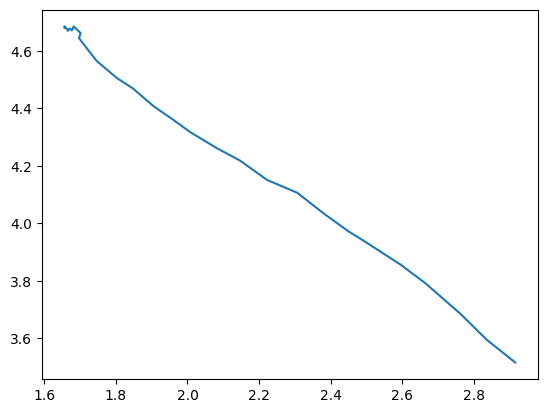

In [109]:
# plot the x and y position of the first 10 states
import matplotlib.pyplot as plt
plt.plot( behavior_dataset.states[:30,0],  behavior_dataset.states[:30,1])

In [135]:
print(loss)
batch_size = 100
horizon = 100
print(states.shape)
states = eval_dataset.states[:horizon].reshape(1,horizon,-1)
actions = eval_dataset.actions[:horizon].reshape(1,horizon,-1)
# states 


0.6967592835426331
torch.Size([1, 100, 9])


In [136]:
print(behavior_dataset.obs_keys)

['poses_x', 'poses_y', 'theta_sin', 'theta_cos', 'ang_vels_z', 'linear_vels_x', 'linear_vels_y', 'previous_action_steer', 'previous_action_speed']


In [137]:

actor = Agent().load(f"/home/fabian/msc/f110_dope/ws_release/config_1501/config/agent_configs/StochasticContinousFTGAgent_0.55_0_0.2_0.15_0.15_5.0_0.4_1.2.json") # have to tidy this up

subsample_laser = 20 


"""
@brief input shape is (batch_size, obs_dim), state needs to be normalized!!
"""
def get_target_actions(states, scans= None, action_timesteps=None, batch_size=5000):
    num_batches = int(np.ceil(len(states) / batch_size))
    actions_list = []
    # batching, s.t. we dont run OOM
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(states))
        batch_states = states[start_idx:end_idx].clone()

        # unnormalize from the dope dataset normalization
        batch_states_unnorm = behavior_dataset.unnormalize_states(batch_states) # this needs batches
        del batch_states
        batch_states_unnorm = batch_states_unnorm.cpu().numpy()

        # get scans
        if scans is not None:
            laser_scan = scans[start_idx:end_idx].cpu().numpy()
        else:
            laser_scan = F110Env.get_laser_scan(batch_states_unnorm, subsample_laser) # TODO! rename f110env to dataset_env
            #print("Scan 1")
            #print(laser_scan)
            laser_scan = F110Env.normalize_laser_scan(laser_scan)
        #print("Scan 2")
        #print(laser_scan)
        # back to dict
        #print(batch_states_unnorm.shape)
        model_input_dict = F110Env.unflatten_batch(batch_states_unnorm)
        # normalize back to model input
        # model_input_dict = model_input_normalizer.normalize_obs_batch(model_input_dict)
        # now also append the laser scan
        # print(model_input_dict)
        model_input_dict['lidar_occupancy'] = laser_scan
        #print("model input dict")
        #print("after unflattening")
        #print(model_input_dict)
        batch_actions = actor(
        model_input_dict,
        std=None)[1]
        #print(batch_actions)
        
        actions_list.append(batch_actions)
    # tf.concat(actions_list, axis=0)
    # with torch
    # convert to torch tensor
    actions_list = [torch.from_numpy(action) for action in actions_list]
    actions = torch.concat(actions_list, axis=0)
    # print(actions)
    return actions.float()

Agent parameters {'speed_multiplier': 0.55, 'gap_blocker': 0, 'deterministic': True, 'std_steer': 0.15, 'std_vel': 0.15, 'max_delta': 0.4, 'max_speed': 5.0, 'min_speed': 1.2}


In [138]:
print(states.shape)
print(actions.shape)
#get_target_action = None
use_dynamics = True

torch.Size([1, 100, 9])
torch.Size([1, 100, 2])


In [143]:
states_inf, actions_inf = model.rollout(states, actions, get_target_action=get_target_actions, horizon=100)

torch.Size([1, 100, 9])


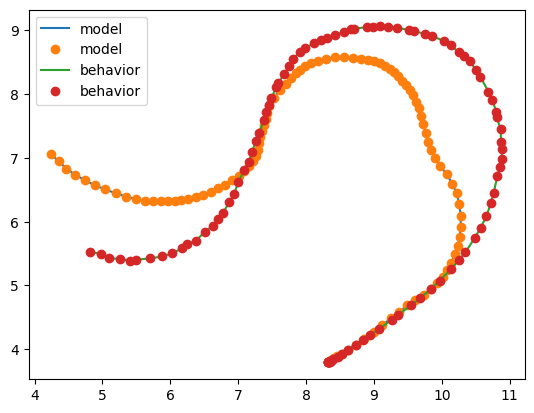

In [144]:
print(states_inf.shape)
# plot the x and y position of the first 10 states
import matplotlib.pyplot as plt
plt.plot( states_inf[0,:,0],  states_inf[0,:,1], label="model")
plt.plot( states_inf[0,:,0],  states_inf[0,:,1],'o' ,label="model")
# plot the first 100 states from the behavior dataset
plt.plot(eval_dataset.states[:100,0],  eval_dataset.states[:100,1], label="behavior")
plt.plot(eval_dataset.states[:100,0],  eval_dataset.states[:100,1],'o', label="behavior")
plt.legend()
plt.show()

In [219]:
import numpy as np
from PIL import Image
import yaml
def is_drivable(yaml_path, poses):
    # Load map metadata
    with open(yaml_path, 'r') as file:
        map_metadata = yaml.safe_load(file)

    # Load the map image
    map_image_path = os.path.join(os.path.dirname(yaml_path), map_metadata['image'])
    map_image = Image.open(map_image_path)
    map_array = np.array(map_image)

    # Map parameters
    resolution = map_metadata['resolution']  # meters per pixel
    origin = map_metadata['origin']  # [x, y, theta]
    occupied_thresh = map_metadata['occupied_thresh']

    # Convert poses to pixel coordinates, invert y-axis
    pixel_poses = poses.copy()
    pixel_poses[:, 0] = (pixel_poses[:, 0] - origin[0]) / resolution
    pixel_poses[:, 1] = map_array.shape[0] - 1 - ((pixel_poses[:, 1] - origin[1]) / resolution)
    pixel_poses = pixel_poses.astype(int)

    # Check bounds
    in_bounds = (pixel_poses[:, 0] >= 0) & (pixel_poses[:, 0] < map_array.shape[1]) & \
                (pixel_poses[:, 1] >= 0) & (pixel_poses[:, 1] < map_array.shape[0])

    # Check if the area is drivable (not occupied)
    # Assuming drivable area is white (high pixel value)
    drivable_threshold = int(255 * (1 - occupied_thresh))
    is_drivable = np.array([map_array[pixel_y, pixel_x] > drivable_threshold if in_bounds[i] else False 
                            for i, (pixel_x, pixel_y) in enumerate(pixel_poses)])
    first_false = np.where(is_drivable == False)[0]
    print(first_false)
    if len(first_false) > 0:
        first_false = first_false[0]
        is_drivable[first_false:] = False
    return is_drivable

In [156]:
# first get started by converting the states back to the unnormalized states
states_unnorm = eval_dataset.unnormalize_states(states_inf)

In [157]:
# in order to calculate the reward we need first two x and y, last progress. That mean
# 1) calculate the progress and append it to the states
# all the obs:
#calculate the progress
from f110_orl_dataset.compute_progress import Progress, Track
progress_obs_np = np.zeros((states_inf.shape[0],states_inf.shape[1],1))
track_path = "/home/fabian/msc/f110_dope/ws_release/f1tenth_gym/gym/f110_gym/maps/Infsaal2/Infsaal2_centerline.csv"
track = Track(track_path)
progress = Progress(track, lookahead=200)
pose = lambda traj_num, timestep: np.array([(states_unnorm[traj_num,timestep,0],states_unnorm[traj_num,timestep,1])])
for i in range(0,states_unnorm.shape[0]):
    # progress = Progress(states_inf[i,0,:])
    progress.reset(pose(i,0))
    for j in range(0,states_unnorm.shape[1]):
        progress_obs_np[i,j,0] = progress.get_progress(pose(i,j))



In [158]:
# then we append the progress to the states
states_unnorm = np.concatenate((states_unnorm, progress_obs_np), axis=2)




In [160]:
# also append zeros to the states, as a placeholder, since this should be times
states_unnorm = np.concatenate((states_unnorm, np.zeros((states_unnorm.shape[0],states_unnorm.shape[1],1))), axis=2)


In [220]:
map = "/home/fabian/msc/f110_dope/ws_release/f1tenth_gym/gym/f110_gym/maps/Infsaal2/Infsaal2_map.yaml"
drivable = is_drivable(map,
            states_unnorm[0,:,0:2])
# if there is a False in drivable set all consequent values to False


[]


In [221]:
print(drivable)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [212]:
def plot_poses_on_map(yaml_path, poses, is_drivable):
    # Load map metadata
    with open(yaml_path, 'r') as file:
        map_metadata = yaml.safe_load(file)

    # Construct the path for the map image
    map_image_path = os.path.join(os.path.dirname(yaml_path), map_metadata['image'])
    map_image = Image.open(map_image_path)
    map_array = np.array(map_image)

    # Display the map
    plt.imshow(map_image, cmap='gray')

    # Map parameters
    resolution = map_metadata['resolution']
    origin = map_metadata['origin']

    # Convert poses to pixel coordinates, invert y-axis
    pixel_poses = poses.copy()
    pixel_poses[:, 0] = (pixel_poses[:, 0] - origin[0]) / resolution
    pixel_poses[:, 1] = map_array.shape[0] - ((pixel_poses[:, 1] - origin[1]) / resolution)

    # Plot each pose
    for pose, drivable in zip(pixel_poses, is_drivable):
        if drivable:
            plt.plot(pose[0], pose[1], 'o', color='green')  # Drivable: green circle
        else:
            plt.plot(pose[0], pose[1], 'x', color='red')  # Not drivable: red x

    # Add legend
    drivable_patch = mpatches.Patch(color='green', label='Drivable')
    not_drivable_patch = mpatches.Patch(color='red', label='Not Drivable')
    plt.legend(handles=[drivable_patch, not_drivable_patch])

    plt.gca().invert_yaxis()  # Invert y-axis to match ROS map orientation
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    plt.title('Poses on Map')
    plt.show()

In [213]:
print(map)

/home/fabian/msc/f110_dope/ws_release/f1tenth_gym/gym/f110_gym/maps/Infsaal2/Infsaal2_map.yaml


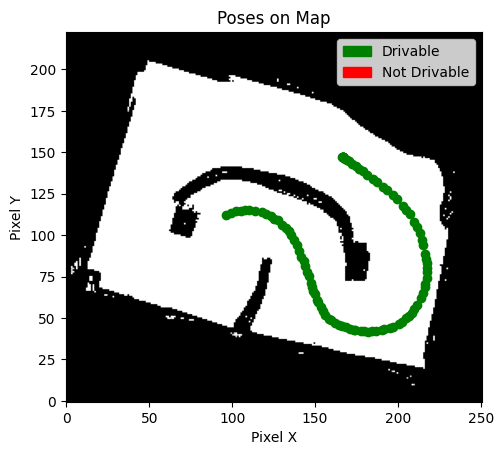

In [214]:
plot_poses_on_map(map, np.array(eval_dataset.states[:100,0:2]), drivable)

In [215]:
print(eval_dataset.states[:2,0:2])
print(states_unnorm[0,:2,:2])

tensor([[8.3287, 3.7933],
        [8.3244, 3.7967]])
[[8.3286953  3.7932992 ]
 [8.3454752  3.81386948]]


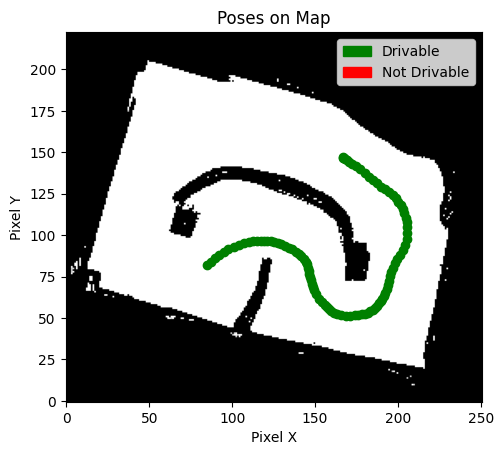

In [216]:
plot_poses_on_map(map, states_unnorm[0,:,0:2], drivable)

In [164]:
actions_unnorm = F110Env.get_specific_obs(states_unnorm[0], ["previous_action_steer","previous_action_speed"])# now the states are in the right shape, lets quickly extract the actions


print(actions_unnorm)
print()

In [169]:
from f110_orl_dataset.fast_reward import MixedReward
from f110_orl_dataset.config_new import Config
config = Config("reward_progress.json")  
mixedReward = MixedReward(F110Env, config)

In [224]:
print(actions_unnorm.shape)

(100, 2)


In [234]:
# now we calculate the dones
num_trajectories = len(states_unnorm)
for i in range(num_trajectories):
    print("!")
    obs = states_unnorm[i]
    action = actions_unnorm
    col = ~is_drivable(map, obs[:,0:2])
    ter = col
    
    laser_scan = F110Env.get_laser_scan(obs, subsample_laser)
    # add a dimnnsion to all the inputs
    laser_scan =  np.expand_dims(laser_scan, axis=0)
    obs = np.expand_dims(obs, axis=0)
    action = np.expand_dims(action, axis=0)
    col = np.expand_dims(col, axis=0)
    ter = np.expand_dims(ter, axis=0)
    rewards, _ = mixedReward(obs, action,col, ter,laser_scan=laser_scan)
    print(rewards)

!
[]
(1, 100, 11)
[[0.98036373 0.98156423 0.98315787 0.98506689 0.98778454 0.99151556
  0.99675127 0.00349072 0.0106936  0.01859763 0.0260695  0.03340929
  0.04033399 0.0468756  0.05273281 0.0587383  0.06426624 0.06954221
  0.07450956 0.07953324 0.08439289 0.0898245  0.09506399 0.10051378
  0.10648528 0.11308021 0.12026697 0.12664722 0.13274752 0.13913091
  0.1453536  0.15116525 0.15762523 0.16357233 0.17002526 0.17616943
  0.18125875 0.18635991 0.19074206 0.1948133  0.198283   0.21454946
  0.21544914 0.21685882 0.21850314 0.2203585  0.22248784 0.2248913
  0.22770298 0.23089284 0.23429477 0.23807885 0.24257479 0.24742103
  0.2517538  0.25567987 0.25916686 0.26242755 0.26531657 0.26803535
  0.27149368 0.27555223 0.28043362 0.2860807  0.29144899 0.29617808
  0.29980633 0.30443117 0.30880477 0.31327393 0.31795497 0.32309117
  0.3279213  0.33280157 0.33790088 0.34337533 0.34949268 0.35587536
  0.36245699 0.36903831 0.37557536 0.38198649 0.3883285  0.39415342
  0.39974729 0.40525985 0.41105

In [235]:
print(rewards)

[[0.         0.12005054 0.15936358 0.19090178 0.27176582 0.37310197
  0.52357053 0.67394467 0.72028839 0.79040336 0.74718686 0.73397913
  0.69246923 0.65416162 0.58572033 0.60054924 0.55279407 0.5275974
  0.49673479 0.50236841 0.48596414 0.54316153 0.52394868 0.54497893
  0.59715045 0.65949252 0.7186764  0.63802504 0.61003016 0.63833827
  0.62226936 0.58116475 0.64599831 0.59471007 0.64529301 0.61441647
  0.50893241 0.51011633 0.43821452 0.40712465 0.34696962 1.62664573
  0.0899685  0.14096804 0.1644316  0.1855363  0.21293403 0.24034614
  0.28116714 0.31898685 0.34019238 0.37840861 0.44959336 0.48462418
  0.43327734 0.3926069  0.34869831 0.32606936 0.28890214 0.27187796
  0.34583275 0.40585569 0.48813896 0.56470782 0.53682878 0.47290864
  0.36282525 0.46248452 0.43735922 0.44691603 0.46810422 0.51361992
  0.48301345 0.48802647 0.50993176 0.54744479 0.61173427 0.63826799
  0.65816306 0.65813226 0.65370469 0.6411131  0.63420122 0.58249218
  0.55938651 0.55125694 0.57922191 0.56623102 0.6

In [218]:
print(states_unnorm)

[[[8.3286953  3.7932992  0.58868551 ... 0.         0.98036373 0.        ]
  [8.3454752  3.81386948 0.64283991 ... 0.         0.98156423 0.        ]
  [8.37199306 3.83621144 0.68313789 ... 0.40000001 0.98315787 0.        ]
  ...
  [4.46751213 6.83306265 0.67981577 ... 2.71652508 0.49898775 0.        ]
  [4.35356522 6.95270109 0.73846006 ... 2.37774491 0.50527753 0.        ]
  [4.24467707 7.0541935  0.76702833 ... 2.05482197 0.51047519 0.        ]]]


In [167]:
print(actions_unnorm[:10])

[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.00000006e-01]
 [-1.27173081e-01  7.88098335e-01]
 [-9.45305973e-02  1.17474747e+00]
 [-9.45301801e-02  1.55920315e+00]
 [ 4.43485826e-02  1.93992138e+00]
 [ 2.39343941e-03  2.31380057e+00]
 [ 2.39343941e-03  2.67138052e+00]
 [ 1.25522599e-01  2.97578096e+00]]
tensor([[[ 1.1070e-02,  2.9000e-01],
         [ 3.7892e-04,  2.9000e-01],
         [ 6.3586e-04,  2.9000e-01],
         [ 4.2896e-04,  2.9000e-01],
         [ 4.8153e-04,  2.8906e-01],
         [ 3.0020e-04,  2.8775e-01],
         [ 2.0822e-05,  2.8612e-01],
         [ 1.3653e-03,  2.8396e-01],
         [ 2.6111e-03,  2.8096e-01],
         [ 1.3794e-03,  2.7654e-01],
         [ 1.1586e-03,  2.6976e-01],
         [ 2.3737e-02,  2.5595e-01],
         [ 6.9466e-04,  2.2204e-01],
         [ 1.5538e-03,  5.4864e-02],
         [ 3.4410e-02, -6.6160e-02],
         [ 1.3923e-02, -6.1284e-02],
         [ 4.6863e-03, -5.2869e-02],
         [ 2.5214e-0

(1, 100, 1)


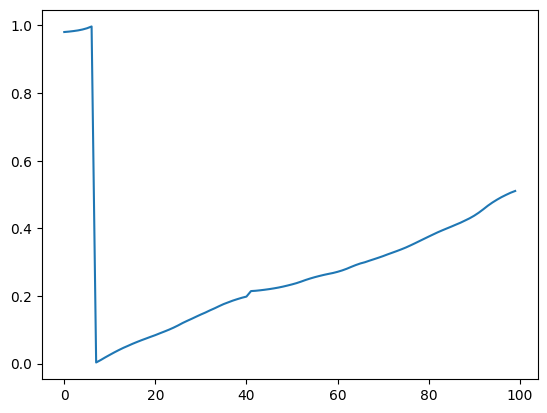

In [153]:
print(progress_obs_np.shape)
plt.plot(progress_obs_np[0,:,0])

In [119]:
print(use_dynamics)


True


In [117]:
with torch.no_grad():
    states_initial = states[:,0,:]
    state_batches = torch.split(states_initial, batch_size) # only do rollouts from timestep 0
    all_states = torch.zeros((0, horizon, states[0].shape[-1]))
    all_actions = torch.zeros((0, horizon, 2))
    
    for num_batch, state_batch in enumerate(state_batches):
        assert len(state_batch.shape) == 2
        assert state_batch.shape[0] <= batch_size
        all_state_batches = torch.zeros((state_batch.shape[0], 0, state_batch.shape[-1]))
        all_actions_batches = torch.zeros((state_batch.shape[0], 0, 2))
        for i in range(horizon):

            if get_target_action is None:
                if i == 0:
                    action = np.zeros((state_batch.shape[0],2),dtype=np.float32)
                    
                    action = torch.tensor(action)
                else:
                    action = actions[num_batch*batch_size:batch_size*(num_batch+1),i -1,:] # (batch,2)
                    action = action.float()
                #print(action.shape)
                assert(action.shape[0] == state_batch.shape[0])
                assert(action.shape[1]==2)
            else:
                if i == 0: #TODO! this is missing in the dataset!
                    action = np.zeros((state_batch.shape[0],2),dtype=np.float32)
                    # action to torch
                    action = torch.tensor(action)
                else:
                    action = get_target_action(state_batch) #.to('cpu').numpy())

                    assert(action.shape[0] == state_batch.shape[0])
                    assert(action.shape[1]==2)
                    action = action
                    #make dtype float32
                    action = action.float()
            # add the action to all_batch_actions along dim=1
            #print("--")
            #print(state_batch.unsqueeze(1).shape)
            #print(action.shape)
            #print(all_state_batches.shape)
           
            all_actions_batches = torch.cat([all_actions_batches, action.unsqueeze(1)], dim=1)
            all_state_batches = torch.cat([all_state_batches, state_batch.unsqueeze(1)], dim=1)
            
            if use_dynamics:
                #print(i)
                state_batch = model(state_batch, action)
                #print("-----")
                #print(state_batch)
            elif horizon-1 != i:
                state_batch = states[:,i+1,:]

        all_states = torch.cat([all_states, all_state_batches], dim=0)
        all_actions = torch.cat([all_actions, all_actions_batches], dim=0)


torch.Size([1, 100, 9])


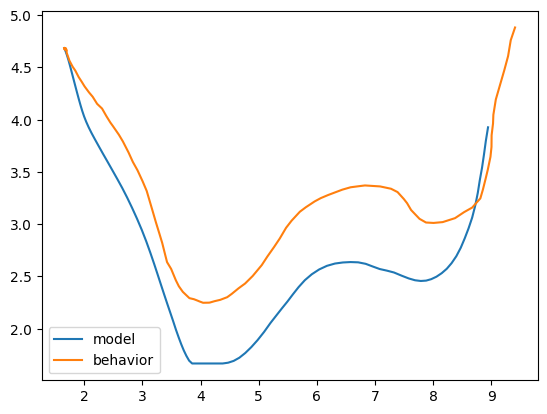

In [118]:
print(all_states.shape)
# plot the x and y position of the first 10 states
import matplotlib.pyplot as plt
plt.plot( all_states[0,:,0],  all_states[0,:,1], label="model")
# plot the first 100 states from the behavior dataset
plt.plot(behavior_dataset.states[:100,0],  behavior_dataset.states[:100,1], label="behavior")
plt.legend()
plt.show()

In [ ]:
rollout(behavior_dataset.states[:10].squeeze(1), behavior_dataset.actions[:10])

In [ ]:
def sample_initial_states(self, initial_mask, min_distance=50, num_samples=20):
    # Find all initial state indices
    initial_indices = np.where(initial_mask == 1)[0]

    # Filter out the indices that don't have at least min_distance before the next initial state
    valid_indices = [idx for i, idx in enumerate(initial_indices[:-1]) if initial_indices[i+1] - idx >= min_distance]

    # If the last state is also valid (i.e., it has more than min_distance states until the end of the array)
    if len(initial_mask) - initial_indices[-1] >= min_distance:
        valid_indices.append(initial_indices[-1])

    # If there are fewer or equal valid indices than num_samples, return all valid indices
    if len(valid_indices) <= num_samples:
        return valid_indices
    
    # Determine the step size to take to get num_samples from the list of valid_indices
    step_size = len(valid_indices) // num_samples

    # Select the indices
    sampled_indices = valid_indices[::step_size][:num_samples]
    
    return sampled_indices

In [ ]:
def plot_rollouts_fast(self, dataset,
                    unnormalize_fn,
                    batch_size = 256, 
                    horizon=100, 
                    num_samples=256, 
                    discount=1.0, 
                    get_target_action=None,
                    use_dynamics=True,
                    path="rollouts_mb_fast.png"):
    
    with torch.no_grad():
        states, actions, rewards, inital_mask = dataset.states, dataset.actions, dataset.rewards, dataset.mask_inital
        

        sampled_initial_indices = sample_initial_states(inital_mask, 
                                                                min_distance=horizon, 
                                                                num_samples=num_samples)
        
        sampled_initial_indices = torch.tensor(sampled_initial_indices)

        sampled_states = torch.stack([states[idx:idx + horizon] for idx in sampled_initial_indices])
        sampled_actions = torch.stack([actions[idx:idx + horizon] for idx in sampled_initial_indices])
        # Use a colormap to generate colors
        num_samples = len(sampled_initial_indices)
        colors = cm.viridis(np.linspace(0, 1, num_samples))

        all_states, all_actions = self.fast_rollout(sampled_states, sampled_actions, 
                                                    get_target_action=get_target_action,
                                                    horizon=horizon,
                                                    batch_size=batch_size,
                                                    use_dynamics=use_dynamics)  
        #print(all_states.shape)
        #print(all_states[0])
        #print(states.shape)
        #print(states[sampled_initial_indices[0]:sampled_initial_indices[0]+horizon, 0:2])
        all_states = all_states.cpu().numpy()
        states = states.cpu().numpy()
        plt.scatter(states[:, 0].reshape(-1)
                    ,states[:, 1].reshape(-1), 
        color='grey', s=5, label='All states', alpha=0.5)

        for i,idx in enumerate(sampled_initial_indices):
            trajectory = all_states[i,:, :2]
            # print(trajectory.shape)
            plt.scatter(trajectory[0, 0], trajectory[0, 1], color=colors[i], marker='x', s=60, label=f'Start {idx + 1}')
            plt.plot(trajectory[:, 0], trajectory[:, 1], label=f"Rollout {idx + 1}", color=colors[i])
            plt.plot(states[idx:idx+horizon, 0], states[idx:idx+horizon, 1],'--', label=f"Ground Truth {idx + 1}", color=colors[i])
        plt.title("Rollouts using Given Actions (torch)")
        # plt.legend()
        plt.savefig(f"{path}")
        plt.clf()
